In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import torch

In [2]:
#creates the environment
env = UnityEnvironment(file_name="./Tennis_Linux/Tennis.x86_64",no_graphics=True)
# The extracts the first brain's name in the environment
brain_name = env.brain_names[0]
# Extracts the brain object using it's name
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [4]:
from SAC import Agent
# initialzing the agent with parameters state size 24, actions size 2 and seed 0
agent = Agent(state_size=24,action_size=2)

Episode 100	Average Score: 0.024900
Episode 200	Average Score: 0.020000
Episode 300	Average Score: 0.019900
Episode 400	Average Score: 0.011000
Episode 500	Average Score: 0.023000
Episode 600	Average Score: 0.030000
Episode 700	Average Score: 0.027000
Episode 800	Average Score: 0.067800
Episode 900	Average Score: 0.079000
Episode 1000	Average Score: 0.119000
Episode 1100	Average Score: 0.160000
Episode 1200	Average Score: 0.185700
Episode 1300	Average Score: 0.218000
Episode 1400	Average Score: 0.272900
Episode 1500	Average Score: 0.552000
Episode 1600	Average Score: 1.147000
Episode 1700	Average Score: 2.343900
Episode 1800	Average Score: 2.087900
Episode 1900	Average Score: 1.662900
Episode 2000	Average Score: 1.690800


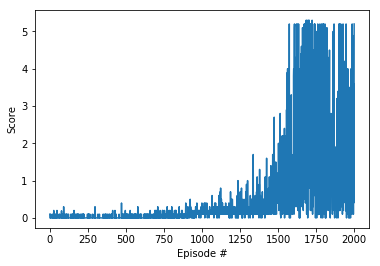

In [5]:
def Train(n_episodes=2000):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # deque containing the last 100 scores
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode = True)[brain_name]
        state = env_info.vector_observations  #extract the current state of the environment
        score = np.asarray([0.,0.]) # initialize the score
        while True: # loop till the episode ends
            action = agent.act(state) # choose an action using actor network policy
            env_info = env.step(action)[brain_name] # peform that action on the environment
            next_state, reward, done = env_info.vector_observations,env_info.rewards,env_info.local_done # extract the next_state,reward and termination condition from the environment
            agent.step(state, action, reward, next_state, done) # update the agents Critic and Actor networks
            state = next_state # update the state information
            score += np.max(reward) # accumalate the reward
            if np.any(done):
                break
        
        scores_window.append(np.max(score))       # save most recent score
        scores.append(np.max(score))              # save most recent score
        print('\rEpisode {}\tAverage Score: {:.6f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.6f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.critic_q_1_local0.state_dict(), 'checkpoint_critic_q_1_local_agent_1.pth')
            torch.save(agent.critic_q_1_local1.state_dict(), 'checkpoint_critic_q_1_local_agent_2.pth')
            torch.save(agent.critic_q_2_local0.state_dict(), 'checkpoint_critic_q_2_local_agent_1.pth')
            torch.save(agent.critic_q_2_local1.state_dict(), 'checkpoint_critic_q_2_local_agent_2.pth')
            torch.save(agent.actor_local0.state_dict(), 'checkpoint_actor_agent_1.pth')
            torch.save(agent.actor_local1.state_dict(), 'checkpoint_actor_agent_2.pth')
            torch.save(agent.critic_v_local0.state_dict(), 'checkpoint_critic_v_local_agent_1.pth')
            torch.save(agent.critic_v_local1.state_dict(), 'checkpoint_critic_v_local_agent_2.pth')
            torch.save(agent.critic_v_target0.state_dict(), 'checkpoint_critic_v_target_agent_1.pth')
            torch.save(agent.critic_v_target1.state_dict(), 'checkpoint_critic_v_target_agent_2.pth')
            break
    return scores

scores = Train()
    
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)),scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
